In [1]:
import tensorflow as tf
import bayesflow as bf
import numpy as np
from bayesflow.trainers import Trainer
from model import model, configurator
from networks import Smoothing, MixtureAmortizer

train = True

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 4)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 100, 2)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


In [2]:
trainer = Trainer(
    amortizer=MixtureAmortizer(inference_net=Smoothing(n_classes=2)), 
    generative_model=model, 
    configurator=configurator, 
    checkpoint_path="checkpoints/smoothing"
)

INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [3]:
%time
if train:
    h = trainer.train_online(epochs=20, iterations_per_epoch=1000, batch_size=64)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs


Training epoch 20: 100%|██████████| 1000/1000 [03:07<00:00,  5.34it/s, Epoch: 20, Iter: 1000,Loss: 9.397,Avg.Loss: 9.219,LR: 0.00E+00]


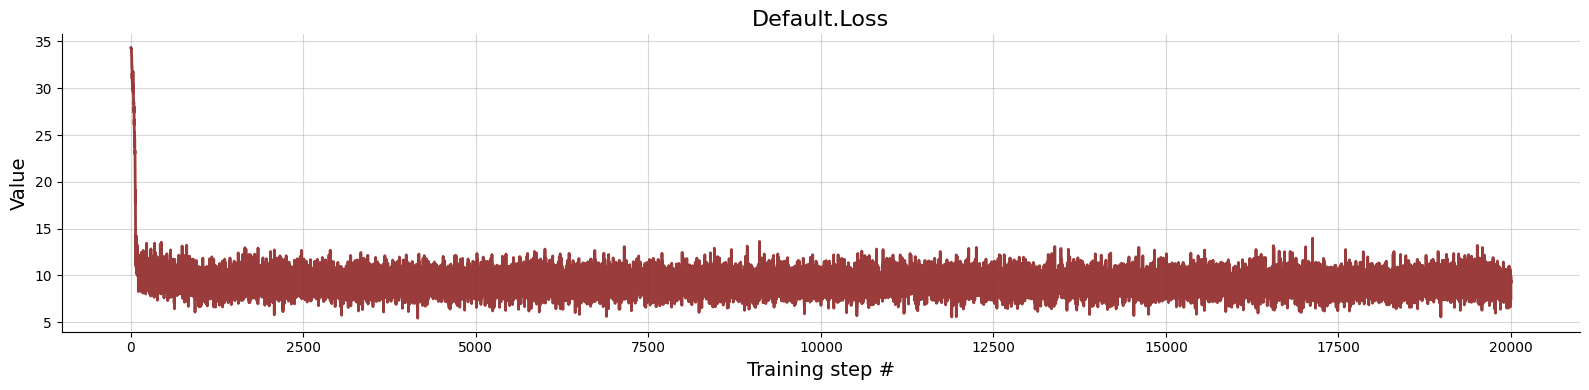

In [4]:
if train:
    f = bf.diagnostics.plot_losses(h)